<a href="https://colab.research.google.com/github/hyeonjun/AlphaZero/blob/master/5_4_Monte_Carlo_Tree_Search_TicTacTo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 몬테카를로 트리 탐색이란?

원시 몬테카를로 탐색에서는 10회 플레이앙웃을 수행한 뒤, 9승 1패의 수가 있다면 해당 수를 선택한다. 하지만 상대가 자신에게 있어 최악 수, 즉 앞에서 1패에 해당하는 수를 반드시 고른다면 경기에서 패배할 수밖에 없다.

여기에서 '유망한 수'를 보다 깊이 조사함으로써 이 문제를 대처할 수 있다. 이 방법을 몬테카를로 트리 탐색이라고 부른다.

몬테카를로 트리 탐색에서 수행하는 시뮬레이션은 '선택', '평가', '전개', '갱신'의 네 가지 동작으로 구성된다.

* 초기 상태

몬테카를로 트리 탐색에서 게임 트리의 초기 상태는 루트 노드(현재 국면)와 그 자식 노드(다음 한 수)만으로 시작한다.

그리고 각 노드는 누계 가치와 시행 횟수 정보를 가진다. 누계 가치는 시뮬레이션을 할 때마다, 노드가 탐색 경로를 지날 때 게임 결과에 따라 '승리: 1', '패배: -1', '무승부: 0'을 더하는 값이다. 시행 횟수는 시뮬레이션을 할 때마다 노드가 탐색 경로를 지날 때 1을 더하는 값이다.

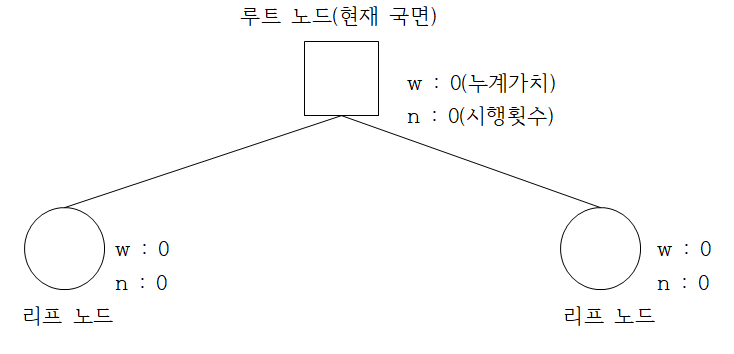

* 선택

선택은 루트 노드에서 시작한다. 루트 노드에서 자식 노드가 존재한다면 선택하고 이동하는 동작을 리프 노드(자식 노드가 없는 노드)에 도착할 때까지 반복한다. 이 동작을 선택이라고 부른다.

이 때, UCB1(바이어스 + 승률)이 가장 큰 자식 노드를 선택하면서 수를 진행한다.

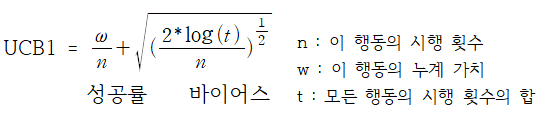

하지만 UCB1은 모든 자식 노드가 시행 횟수 1 이상이 되지 않으면 계산할 수 없으므로(분모가 0인 나눗셈이 됨), 시행 횟수가 0인 자식 노드가 있는 경우에는 그 노드부터 선택한다. 최초에는 양쪽 모두 0이므로 먼저 발견한 쪽을 선택한다.

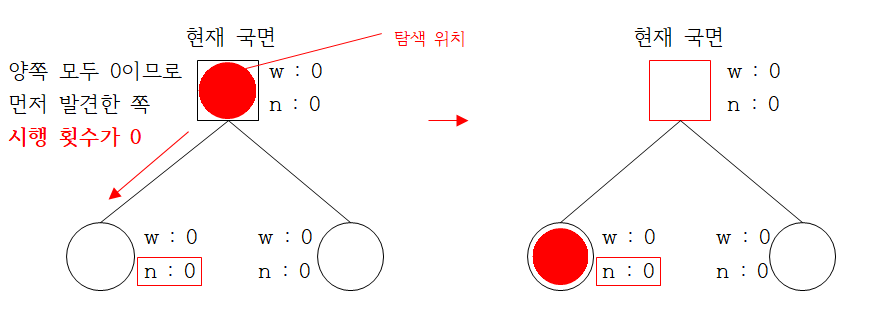

* 평가

탐색이 리프 노드에 도달하면 플레이아웃을 실행한다. 이 동작을 평가(Evaluation)라고 한다.

게임 종료 시까지 둘 수 있는 수를 무작위로 놓아서 '승리 : 1', '패배 : -1', '무승부 : 0'과 같은 '가치'를 더한다. 그리고 리프 노드의 보상 누계에 그 가치를, 시행 횟수에는 1을 더한다.

예시에서는 이 리프 노드로부터 랜덤으로 둘 수 있는 수를 선택해서 수를 두었을 때 승리했으므로 보상 누계와 시행 횟수에 모두 1이 더해진다.

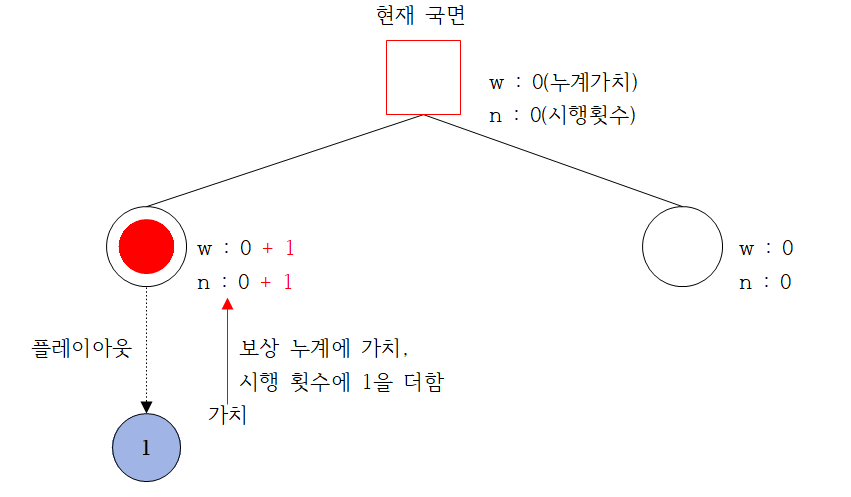

* 전개

플레이아웃 후에 리프 노드의 시행 횟수가 임의의 횟수 이상(여기서는 10회)이 되면 그 노드가 가진 가능한 자식 노드로 추가한다. 이 동작을 전개(Expansion)라고 부른다.

첫 번째 시뮬레이션에서 리프 노드의 시행 횟수는 아직 1이므로 전개하지 않는다.

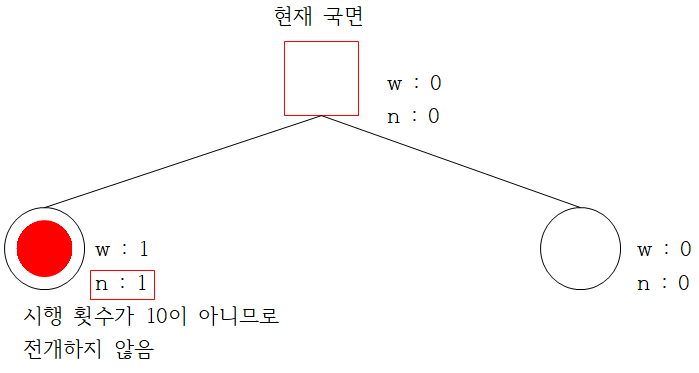

* 갱신

플레이아웃이 끝나면 '루트 노드'까지 되돌아오면서 노드의 보상 누계에 플레이아웃에서 가산한 가치, 시행 횟수에 1을 더하는 동작을 반복한다. 이 동작을 갱신(Backup)이라고 부른다.

첫 번째 시뮬레이션에서는 루트 노드의 누계 가치, 시행 횟수의 변경만 한다.

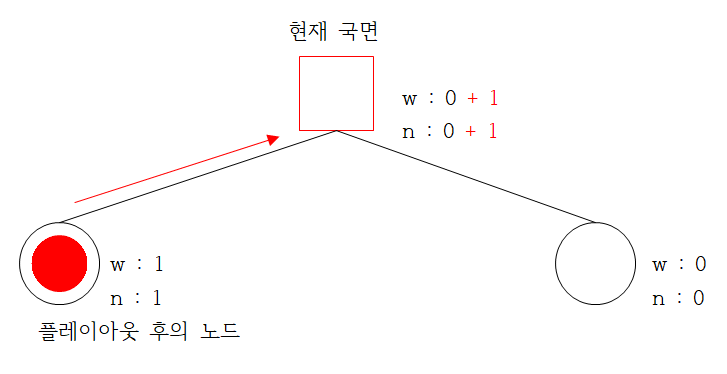

* 두 번째 시뮬레이션

루트 노드에서 탐색을 시작해 선택, 평가, 전개, 갱신의 4가지 동작으로 탐색을 수행하고, 루트 노드로 돌아오면 한 번의 시뮬레이션이 끝난다.

두 번째 시뮬레이션에서는 선택에서 시행 횟수가 0인 리트 노드를 선택한다. 그리고 플레이아웃을 실행한 후, 전개는 시행 횟수가 10이 아니므로 전개하지 않고, 갱신에서 누계 가치와 시행 횟수를 갱신한다.

아래에서는 패배로 하여 가치를 -1로 갱신한다.

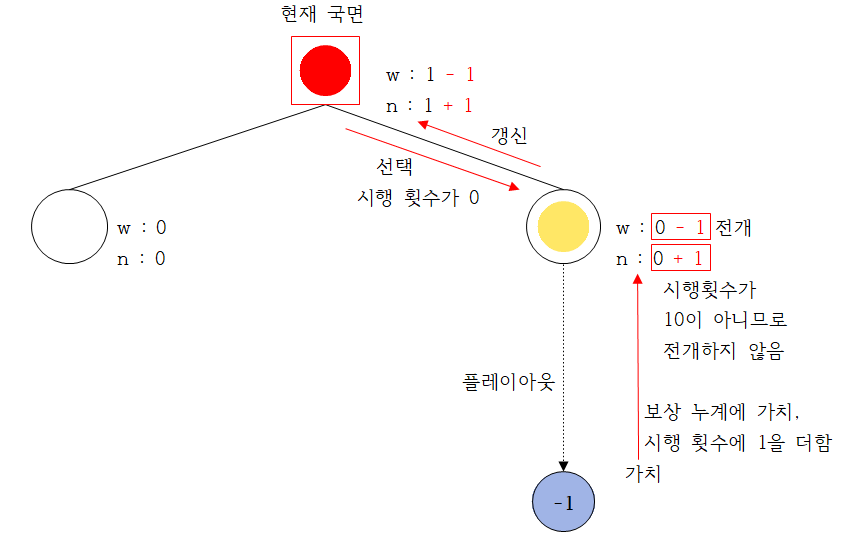

* 3회차 시뮬레이션

3회차 시뮬레이션에서는 선택에서 모든 자식 노드의 시행 횟수가 1 이상이 되었으므로 UCB1(바이어스 + 효율)이 가장 큰 자식 노드를 선택한다. 그리고 플레이아웃을 실행한 뒤, 시행 횟수가 10이 아니므로 전개는 하지않고, 갱신에서 누계 가치와 시행 횟수를 갱신한다.

아래에서는 승리한 것을 표현하며, 가치 +1로 갱신한다.

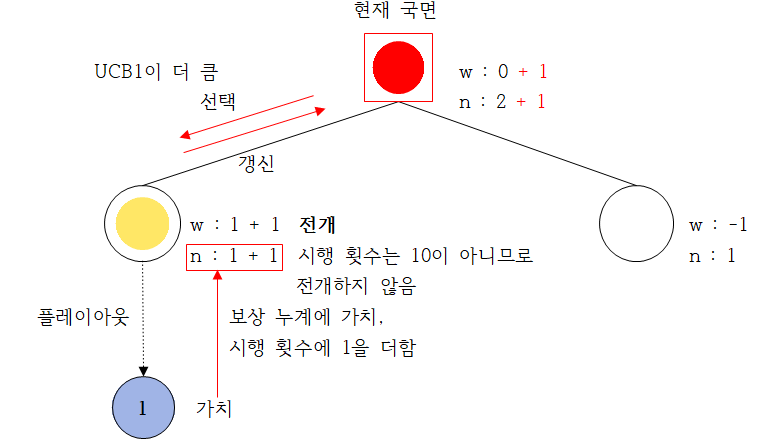

* 15회차 시뮬레이션

시뮬레이션을 반복해 리프 노드의 시행 횟수가 10이 되었을 때 전개를 수행한다.
누계 가치, 수행 횟수가 0인 자식 노드가 둘 수 있는 숫자만큼 생성된다.

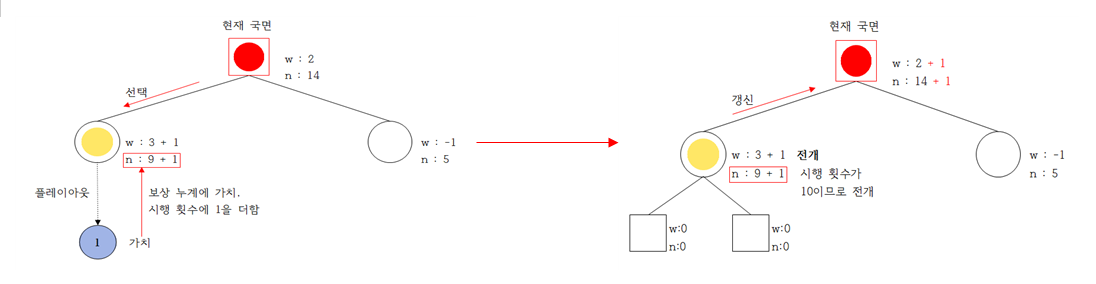

* 16회차 시뮬레이션

루트 노드로부터 떨어진 리프 노드에서 갱신을 수행할 때는 루트 노드에 도달할 때 지나는 모든 노드의 누계 가치, 시행 횟수를 갱신한다.

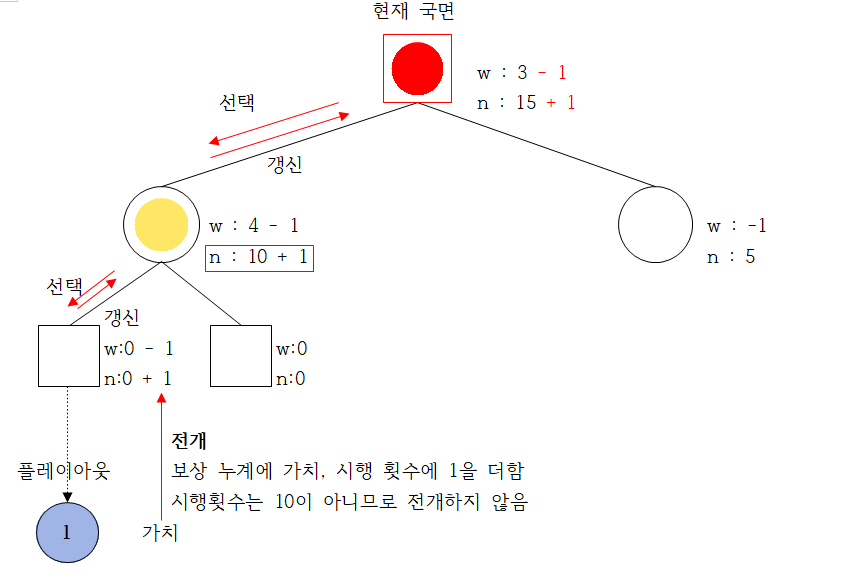

# 시행 횟수가 가장 큰 행동을 선택

충분히 시뮬레이션을 반복(여기서는 100회)한 후, 시행 횟수가 가장 큰 행동을 다음 한 수로 선택한다. 누계 가치는 탐색 시에만 사용되며, 최종적으로 행동을 선택할 때는 사용하지 않는다.

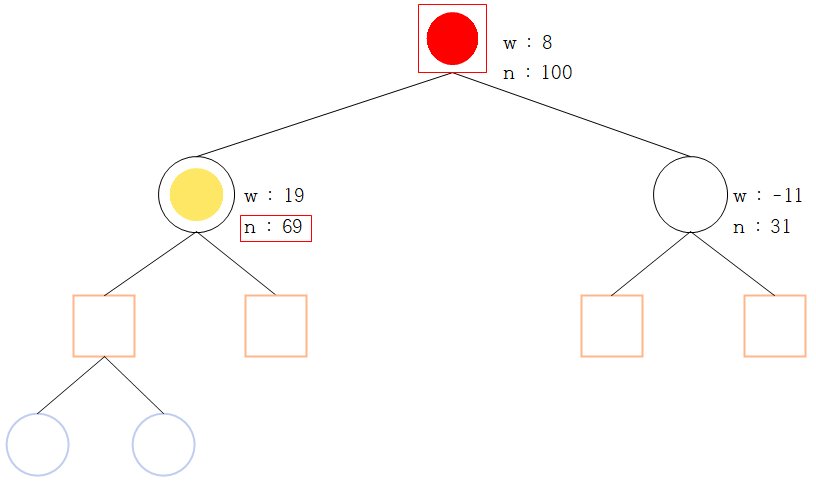

In [ ]:
# 틱택토 구현
import random

# 게임 상태
class State:
    # 초기화
    def __init__(self, pieces=None, enemy_pieces=None):
        # 돌 배치
        self.pieces = pieces if pieces != None else [0] * 9
        self.enemy_pieces = enemy_pieces if enemy_pieces != None else [0] * 9

    # 돌의 수 취득
    def piece_count(self, pieces):
        count = 0
        for i in pieces:
            if i == 1:
                count +=  1
        return count

    # 패배 여부 확인
    def is_lose(self):
        # 돌 3개 연결 여부
        def is_comp(x, y, dx, dy):
            for k in range(3):
                if y < 0 or 2 < y or x < 0 or 2 < x or \
                    self.enemy_pieces[x+y*3] == 0:
                    return False
                x, y = x+dx, y+dy
            return True

        # 배패 여부 확인
        if is_comp(0, 0, 1, 1) or is_comp(0, 2, 1, -1):
            return True
        for i in range(3):
            if is_comp(0, i, 1, 0) or is_comp(i, 0, 0, 1):
                return True
        return False

    # 무승부 여부 확인
    def is_draw(self):
        return self.piece_count(self.pieces) + self.piece_count(self.enemy_pieces) == 9

    # 게임 종료 여부 확인
    def is_done(self):
        return self.is_lose() or self.is_draw()

    # 다음 상태 얻기
    def next(self, action):
        pieces = self.pieces.copy()
        pieces[action] = 1
        return State(self.enemy_pieces, pieces)

    # 합법적인 수의 리스트 얻기
    def legal_actions(self):
        actions = []
        for i in range(9):
            if self.pieces[i] == 0 and self.enemy_pieces[i] == 0:
                actions.append(i)
        return actions

    # 선 수 여부 확인
    def is_first_player(self):
        return self.piece_count(self.pieces) == self.piece_count(self.enemy_pieces)

    # 문자열 표시
    def __str__(self):
        ox = ('o', 'x') if self.is_first_player() else ('x', 'o')
        str = ''
        for i in range(9):
            if self.pieces[i] == 1:
                str += ox[0]
            elif self.enemy_pieces[i] == 1:
                str += ox[1]
            else:
                str += '-'
            if i % 3 == 2:
                str += '\n'
        return str

In [ ]:
# 랜덤으로 행동 선택
def random_action(state):
    legal_actions = state.legal_actions()
    return legal_actions[random.randint(0, len(legal_actions)-1)]

In [ ]:
# 알파베타법을 활용한 상태 가치 계산
def alpha_beta(state, alpha, beta):
    # 패배 시, 상태 가치 -1
    if state.is_lose():
        return -1
    
    # 무승부 시, 상태 가치 0
    if state.is_draw():
        return  0

    # 합법적인 수의 상태 가치 계산
    for action in state.legal_actions():
        score = -alpha_beta(state.next(action), -beta, -alpha)
        if score > alpha:
            alpha = score

        # 현재 노드의 베스트 스코어가 새로운 노드보다 크면 탐색 종료
        if alpha >= beta:
            return alpha

    # 합법적인 수의 상태 가치의 최대값을 반환
    return alpha

# 알파베타법을 활용한 행동 선택
def alpha_beta_action(state):
    # 합법적인 수의 상태 가치 계산
    best_action = 0
    alpha = -float('inf')
    for action in state.legal_actions():
        score = -alpha_beta(state.next(action), -float('inf'), -alpha)
        if score > alpha:
            best_action = action
            alpha = score
            
    # 합법적인 수의 상태 가치값 중 최대값을 선택하는 행동 반환
    return best_action

In [ ]:
# 플레이아웃
def playout(state):
    # 패배 시, 상태 가치 -1
    if state.is_lose():
        return -1
    
    # 무승부 시, 상태 가치 0
    if state.is_draw():
        return  0
    
    # 다음 상태의 상태 평가
    return -playout(state.next(random_action(state)))

In [ ]:
# 최대값의 인덱스를 반환
def argmax(collection, key=None):
    return collection.index(max(collection))

# 몬테카를로 트리 탐색의 행동 선택

다음 코드의 mcts_action(state)는 몬테카를로 트리 탐색으로 상태(국면)에 맞추어 행동을 반환한다. 인수는 상태뿐이다.

현재 국면의 노드 작성 후 100회의 시뮬레이션을 실행한다. 그 결과 시행 횟수가 가장 큰 행동을 다음 한 수로 선택한다.

* 몬테카를로 트리 탐색 노드

몬테카를로 트리 탐색 노드는 관리를 쉽게 할 수 있도록 Node클래스로 정리한다. Node 클래스의 멤버 변수는 아래와 같다.

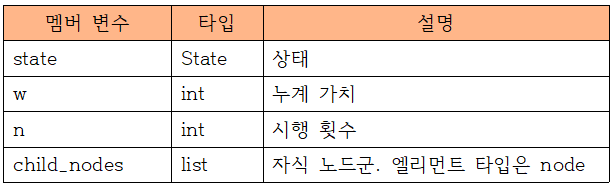

Node 클래스의 메소드는 아래와 같다.

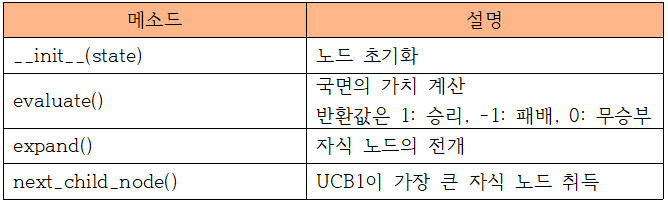


# 국면 가치 계산
'evaluate()'는 국면 가치를 계산한다.

(1) 게임이 종료되는 경우
게임이 종료되는 경우 패배 시 -1, 무승부 시는 0을 반환한다. 이때, 노드의 누계 가치와 시행 횟수도 갱신한다.

(2) 자식 노드군이 존재하지 않는 경우
게임이 종료되는 경우를 제외하고, 자식 노드군을 갖지 않은 노드는 자식 노드를 전개할 수는 있지만
아직까지 전개하지 않은 노드다. 자식 노드군이 존재하지 않을 경우에는 플레이 아웃을 수행해서 가치를 얻는다.
이때, 노드의 누계 가치와 시행 횟수도 갱신한다. 또한, 시행 횟수가 10이 되면 자식 노드군을 전개한다.

(3) 자식 노드군이 존재하는 경우
자식 노드군이 존재하는 경우(리프가 아닌 노드)는 UCB1이 가장 큰 자식 노드의 평가를 재귀적으로 계산한다.
이 때 노드의 누계 가치와 시행 횟수도 갱신한다. 또한, evaluate()의 가치는 상대 국면의 가치이므로 마이너스(-)를 붙인다.


In [ ]:
import math

# 몬테카를로 트리 탐색의 행동 선택
def mcts_action(state):
  # 몬케카를로 트리 탐색의 노드 정의
  class Node:
    def __init__(self, state):
      self.state = state # 상태
      self.w = 0 # 보상 누계
      self.n = 0 # 시행 횟수
      self.child_nodes = None # 자녀 노드군
    
    # 국면 가치 계산
    def evaluate(self):
      # 게임 종료 시
      if self.state.is_done():
        # 승패 결과로 가치 취득
        value = -1 if self.state.is_lose() else 0 # 패배 시 -1, 무승부 0

        # 보상 누계와 시행 횟수 갱신
        self.w += value
        self.n += 1
      
      # 자식 노드군이 존재하지 않는 경우
      if not self.child_nodes:
        # 플레이아웃으로 가치 얻기
        value = playout(self.state)

        # 보상 누계와 시행 횟수 갱신
        self.w += value
        self.n += 1

        # 자녀 노드 전개
        if self.n == 10:
          self.expand()
        return value
      
      # 자녀 노드가 존재하는 경우
      else:
        # UCB1이 가장 큰 자녀 노드를 평가해 가치 얻기
        value = -self.next_child_node().evaluate()

        # 보상 누계와 시행 횟수 갱신
        self.w += value
        self.n += 1
        return value
    
    # 자녀 노드 전개
    # expand()는 자식 노드를 전개하는데, 둘 수 있는 수만큼 노드를 작성하고, child_nodes에 추가.
    def expand(self):
      legal_actions = self.state.legal_actions()
      self.child_nodes = []
      for action in legal_actions:
        self.child_nodes.append(Node(self.state.next(action)))
      
    # UCB1이 가장 큰 자식 노드 얻기
    # next_child_node()는 UCB1이 가장 큰 노드를 얻는다. 시행 횟수가 0인 자식 노드가 존재하는 경우
    # 그 자식 노드를 반환한다. 시행 횟수 0인 자식 노드가 존재하면 분모가 0인 나눗셈이 되므로
    # UCB1을 계산할 수 없기 때문이다.
    def next_child_node(self):
      # 시행 횟수가 0인 자식 노드 반환
      for child_node in self.child_nodes:
        if child_node.n == 0:
          return child_node
      
      # UCB1 계산
      t = 0
      for c in self.child_nodes:
        t += c.n
      ucb1_values = []
      for child_node in self.child_nodes:
        ucb1_values.append(-child_node.w/child_node.n+(2*math.log(t)/child_node.n)**0.5)
      
      # UCB1이 가장 큰 자녀 노드 반환
      return self.child_nodes[argmax(ucb1_values)]

  # 현재 국면의 노드 생성
  root_node = Node(state)
  root_node.expand()

  # 100회 시뮬레이션 실행
  for _ in range(100):
    root_node.evaluate()

  # 시행 횟수가 가장 큰 값을 갖는 행동 반환
  legal_actions = state.legal_actions()
  n_list = []
  for c in root_node.child_nodes:
    n_list.append(c.n)
  return legal_actions[argmax(n_list)]

In [ ]:
# 몬테카를로 트리 탐색 VS 랜덤 and 몬테카를로 트리 탐색 VS 알파베타법

# 파라미터
EP_GAME_COUNT = 100 # 평가 1회당 게임 수

# 선 수 플레이어 포인트
def first_player_point(ended_state):
  # 1 : 선 수 플레이어 승리, 0 : 선 수 플레이어 패배, 0.5 : 무승부
  if ended_state.is_lose():
    return 0 if ended_state.is_first_player() else 1
  return 0.5

# 게임 실행
def play(next_actions):
  # 상태 생성
  state = State()

  # 게임 종료 시까지 반복
  while True:
    # 게임 종료 시
    if state.is_done():
      break
    
    # 행동 얻기
    next_action = next_actions[0] if state.is_first_player() else next_actions[1]
    action = next_action(state)

    # 다음 상태 얻기
    state = state.next(action)
  
  # 선 수 플레이어 포인트 반환
  return first_player_point(state)

# 임의의 알고리즘 평가
def evaluate_algorithm_of(label, next_actions):
  # 여러 차례 대전 반복
  total_point = 0
  for i in range(EP_GAME_COUNT):
    # 1 게임 실행
    if i % 2 == 0:
      total_point += play(next_actions)
    else:
      total_point += 1 - play(list(reversed(next_actions)))

    # 출력
    print('\rEvaluate {}/{}'.format(i+1, EP_GAME_COUNT), end='')
  print('')

  # 평균 포인트 계산
  average_point = total_point / EP_GAME_COUNT
  print(label.format(average_point))


# VS 랜덤
next_actions = (mcts_action, random_action)
evaluate_algorithm_of('VS_Random {:.3f}',next_actions)

# VS 알파베타법
next_actions = (mcts_action, alpha_beta_action)
evaluate_algorithm_of('VS_AlphaBeta {:.3f}',next_actions)

Evaluate 100/100
VS_Random 0.970
Evaluate 100/100
VS_AlphaBeta 0.325
